Problem 3c.
$\sum_{k=1}^{\infty} P(Y=k)=\sum_{k=1}^\infty\frac{1}{k(k+1)(k+2)}=
\frac{1}{2}\sum_{k=1}^\infty\left(\frac{1}{k(k+1)}-\frac{1}{(k+1)(k+2)}\right)=
\frac{1}{2}\cdot\frac{1}{2} - 0 = \frac{1}{4}$
$\sum_{k=1}^{\infty} P(Y=-k)=\sum_{k=1}^\infty\frac{1}{|-k|(|-k|+1)(|-k|+2)}=
\sum_{k=1}^\infty\frac{1}{k(k+1)(k+2)}=\frac{1}{4}$
$P(Y=0)=\frac{1}{2}$
$\sum_k P(Y=k) = 2 \cdot \frac{1}{4} + \frac{1}{2} = 1$
<p>Zatem jest to rozkład dyskretny<br>

$EY=\sum_k k\cdot P(Y=k) =0 \cdot \frac{1}{2}+ \sum_{k=1}^\infty[\frac{k}{k(k+1)(k+2)}-\frac{k}{|-k|(|-k|+1)(|-k|+2)}]
=0+\sum_{k=1}^\infty\frac{k-k}{k(k+1)(k+2)}=0$
$Var(Y) = E(Y^2) - (E(Y))^2 = \sum_k k^2 \cdot P(Y=k) =
\sum_{k=1}^\infty\frac{2k}{(k+1)(k+2)}\sim\sum_{k=1}^{\infty}\frac{1}{k}=+\infty$
<p>Ponieważ szereg ten nie jest absolutnie zbieżny, $Y$ nie ma wariancji.

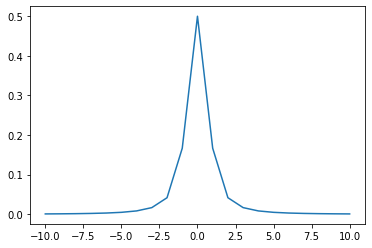

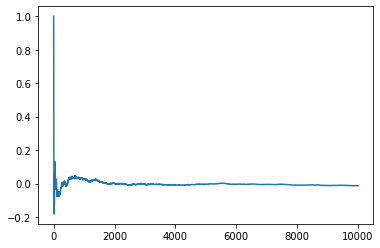

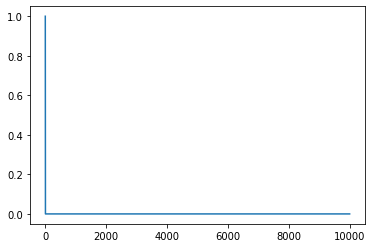

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

def p(k):
    if k == 0:
        return 1 / 2
    else:
        return 1 / (abs(k) * (abs(k) + 1) * (abs(k) + 2))


xs = np.arange(-10, 11)
ys = np.vectorize(p)(xs)
plt.plot(xs, ys)
plt.show()

def cube_rand():
    cube = np.random.randint(1, 5)

    if cube <= 2:
        return 0
    elif cube == 3:
        return 1
    else:
        return -1


def find_k(x):
    z = 0
    while x >= 0:
        z += 1
        x -= 4 * p(x)

    return z


def sample():
    x = np.random.uniform()

    return cube_rand() * find_k(x)


xs_n = np.arange(1, N + 1)
y_n = np.array([sample() for i in xs_n])
y_n_sum = np.cumsum(y_n)
y_n_mov_avr = y_n_sum / xs_n

plt.plot(xs_n, y_n_mov_avr)
plt.show()
#patrząc na wykres widzimy, że szereg zbiega do 0

y_n_med = [np.median(y_n[:i]) for i in xs_n]

plt.plot(xs_n, y_n_med)
plt.show()